In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import HybridTSBHLUPER
from porise.envs.real import CMOEnvV2
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
# env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)
env = CMOEnvV2(rat_log_path='../porise/data/sampled_rat_log_exp5217.csv', 
            user_vectors_map=user_map,
            non_logged_user_percent=0.3
            )

In [4]:
model = HybridTSBHLUPER(
    n_arms=env.n_arms,
    alpha=2,
    arm_feat_dim=env.arm_feat_dim,
    user_feat_dim=env.user_feat_dim,
    return_list=False,
    memory_size=int(1e4),
    prio_a=0.6,
    prio_beta=0.4,
    prio_e=0.001,
    beta_increment_per_sampling=0.4e-6,
    batch_size=128,
    epochs=10,
)

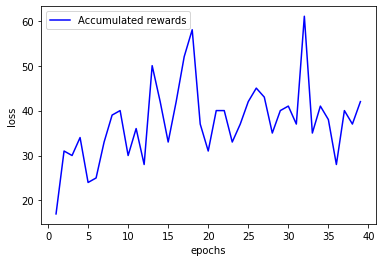

400000it [1:04:39, 103.10it/s, total reward=1501.0]                            


In [5]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()

In [6]:
import numpy as np
np.save('results/sampled_log_HybridTSBHLUPER_cmo_0.3.npy', simulator.rewards)

In [7]:
simulator.rewards.sum()

1502.0